###Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

###Baca Dataset dari github

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/romanouke/Data-Preprocessing-Dataset-DSAI/main/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


###**Nomor 1**.
###Jumlah baris pada dataset

In [ ]:
df.shape[0]

1025

###Jumlah kolom pada dataset

In [ ]:
df.shape[1]

14

###Mengecek tipe data dari tiap feature/kolom dan dapat dilihat bahwa tipe data pada semua kolom pada dataset adalah tipe data numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


###Mengecek apakah ada missing value pada dataset dan setelah dilakukan tidak ada missing value pada dataset

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###Mengecek data duplikasi/lebih dari 1 data yang sama berdasarkan baris dan ternyata pada dataset terdapat 723 baris data yang telah lebih dari 1

In [ ]:
df.duplicated().sum()

723

###Membuang/menghapus data duplikasi

In [ ]:
df_after_duplicated = df.drop_duplicates()

###Mengecek jumlah baris dan kolom setelah data duplikasi dihapus dan sisa data dari dataset sebanyak 302 baris dan tetap 14 kolom

In [ ]:
df_after_duplicated.shape[0], df_after_duplicated.shape[1]

(302, 14)

###Mengecek data outliers dari kolom "chol" dengan menggunakan boxplot dan ternyata terdapat data outliers sehingga data ini perlu ditangani

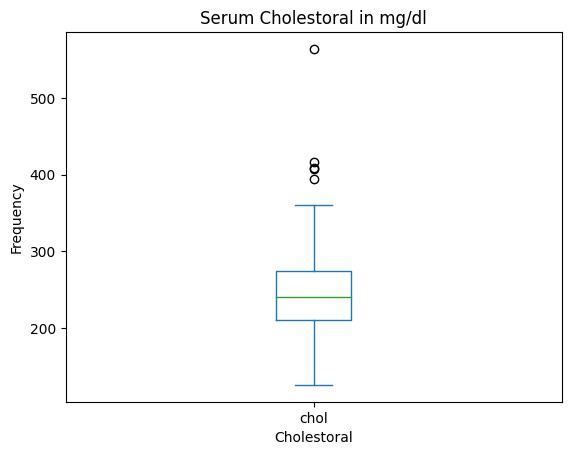

In [ ]:
df_after_duplicated['chol'].plot.box(title="Serum Cholestoral in mg/dl", xlabel="Cholestoral", ylabel="Frequency")
plt.show()

###Menangani data outliers dengan menggunakan 2 metode yaitu Z-Score dan IQR method

###Z-Score
###Langkah pertama yaitu mencari nilai batas atas dan bawah dari data dengan menggunakan rumus

```
 mean + (3 x standar deviasi) -> Upper limit
 mean - (3 x standar deviasi) -> Lower limit
```



In [ ]:
#Z-Score method
upper_limit = df_after_duplicated['chol'].mean() + 3*df_after_duplicated['chol'].std()
lower_limit = df_after_duplicated['chol'].mean() - 3*df_after_duplicated['chol'].std()

print(f"Upper limit of chol is: {upper_limit}")
print(f"Lower limit of chol is: {lower_limit}")

Upper limit of chol is: 401.76046596722165
Lower limit of chol is: 91.23953403277832


###Mengecek data outliers dengan menggunakan kondisi dimana data diatas value upper limit dan dibawah lower limit

In [ ]:
#Find the outliers
df_after_duplicated.loc[(df_after_duplicated['chol'] > upper_limit) | (df_after_duplicated['chol'] < lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


###Menghapus data outliers, dimana terdapat 4 data outliers yang dihapus

In [ ]:
df_after_dup_without_outliers_using_Zscore = df_after_duplicated.loc[(df_after_duplicated['chol'] < upper_limit) & (df_after_duplicated['chol'] > lower_limit)]
print(f"Data before delete outliers is: {len(df_after_duplicated)}")
print(f"Data after delete outliers is: {len(df_after_dup_without_outliers_using_Zscore)}")
print(f"So, the outliers is {len(df_after_duplicated) - len(df_after_dup_without_outliers_using_Zscore)}")

Data before delete outliers is: 302
Data after delete outliers is: 298
So, the outliers is 4


###Boxplot kolom "Chol" setelah data outliers dihapus, dan ternyata masih terdapat data outliers dimana data outliers ini disebut "Allowed Outliers"

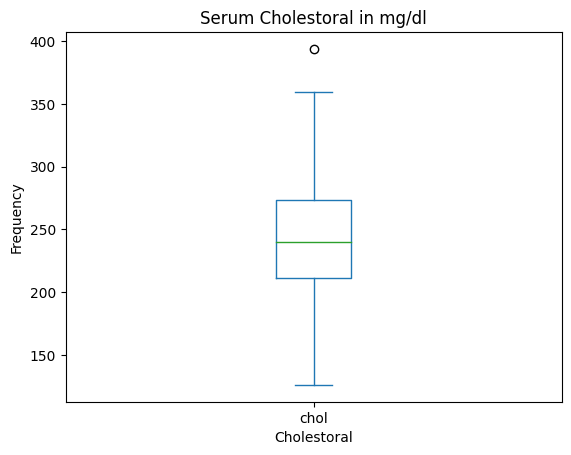

In [ ]:
df_after_dup_without_outliers_using_Zscore['chol'].plot.box(title="Serum Cholestoral in mg/dl", xlabel="Cholestoral", ylabel="Frequency")
plt.show()

###IQR Method
###Mencari nilai q1, q3, dan range antara q1 dan q3 (q2)

In [ ]:
#Using IQR method
q1 = df_after_duplicated['chol'].quantile(0.25)
q3 = df_after_duplicated['chol'].quantile(0.75)
iqr_range = q3 - q1
q1,q3,iqr_range

(211.0, 274.75, 63.75)

###Mencari nilai batas atas dan batas bawah

```
q3 + (1.5 x q2) -> Upper Limit
q1 - (1.5 x q2) -> Lower Limit
```



In [ ]:
upper_limit_IQR = q3 + (1.5 * iqr_range)
lower_limit_IQR = q1 - (1.5 * iqr_range)
upper_limit_IQR,lower_limit_IQR

(370.375, 115.375)

###Mengecek data outliers dengan menggunakan kondisi dimana data diatas value upper limit dan dibawah lower limit

In [ ]:
df_after_duplicated.loc[(df_after_duplicated['chol'] > upper_limit_IQR) | (df_after_duplicated['chol'] < lower_limit_IQR)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


###Menghapus data outliers, dimana terdapat 5 data outliers yang dihapus dengan metode IQR

In [ ]:
df_after_dup_without_outliers_using_IQR = df_after_duplicated.loc[(df_after_duplicated['chol'] < upper_limit_IQR) & (df_after_duplicated['chol'] > lower_limit_IQR)]
print(f"Data before delete outliers is: {len(df_after_duplicated)}")
print(f"Data after delete outliers is: {len(df_after_dup_without_outliers_using_IQR)}")
print(f"So, the outliers is {len(df_after_duplicated) - len(df_after_dup_without_outliers_using_IQR)}")

Data before delete outliers is: 302
Data after delete outliers is: 297
So, the outliers is 5


###Boxplot kolom "Chol" setelah data outliers dihapus, dimana tidak ada lagi data outliers yang ada

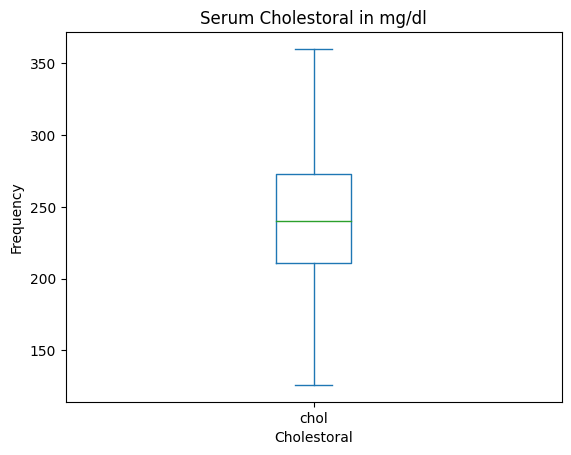

In [ ]:
df_after_dup_without_outliers_using_IQR['chol'].plot.box(title="Serum Cholestoral in mg/dl", xlabel="Cholestoral", ylabel="Frequency")
plt.show()

###Mengecek imbalance data pada data target (kolom "target") dengan menggunakan pie plot yang mana terdapat imbalance data antara "Disease" dan "No Disease"

1    161
0    136
Name: target, dtype: int64


<Axes: ylabel='target'>

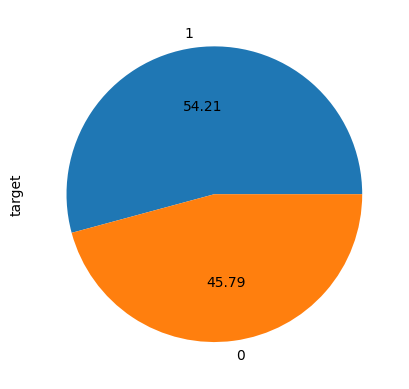

In [ ]:
print(df_after_dup_without_outliers_using_IQR['target'].value_counts())
df_after_dup_without_outliers_using_IQR['target'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
df_after_dup_without_outliers_using_IQR

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


###Mengatasi imbalance data dengan menggunakan Random Under Sampler dimana data akan disesuaikan dengan data yang terkecil

target
0         136
1         136
dtype: int64


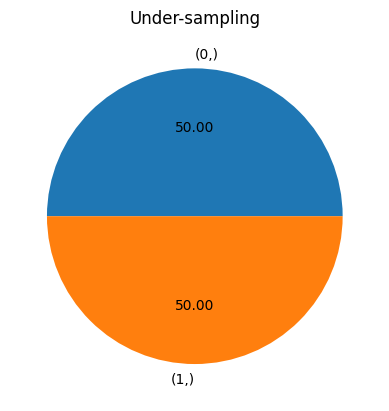

In [ ]:
df_imbalaced = df_after_dup_without_outliers_using_IQR

X_res = df_imbalaced.iloc[:, :-1]
df_res = df_imbalaced[['target']]

rus = RandomUnderSampler(sampling_strategy=1)
X_undersampled, y_undersampled = rus.fit_resample(X_res, df_res)

dfAfterBalancedAndRemoveDuplicateAndOutliersValues = pd.concat([X_undersampled, y_undersampled], axis=1)

print(y_undersampled.value_counts())
ax = y_undersampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
dfAfterBalancedAndRemoveDuplicateAndOutliersValues

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
268,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
269,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1
270,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1


###Mengecek apakah ada tipe data selain "numerical" setelah mengatasi imbalance data, duplicate data, outliers data dan hasilnya tidak ada data selain numerical

In [ ]:
dfAfterBalancedAndRemoveDuplicateAndOutliersValues.select_dtypes(object).head()

""
0
1
2
3
4


###Membuat dataframe baru

In [ ]:
new_dataframe = dfAfterBalancedAndRemoveDuplicateAndOutliersValues

###**Nomor 2**.
###Membuat dataframe untuk nomor 2 dari data yang telah melewati tahapan-tahapan sesuai nomor 1

In [ ]:
df_number2 = new_dataframe

###Mengubah beberapa data dari kolom menjadi tipe data "Object" untuk latihan proses encoding

In [ ]:
def change_value_target(row):
    if row['target'] == 0:
        return 'No Disease'
    elif row['target'] == 1:
        return 'Disease'
    else:
        return row['target']

df_number2['target'] = df_number2.apply(lambda row: change_value_target(row), axis=1)

def change_value_slope(row):
    if row['slope'] == 0:
        return 'Upsloping'
    elif row['slope'] == 1:
        return 'Flat'
    elif row['slope'] == 2:
        return 'Downsloping'
    else:
        return row['slope']

df_number2['slope'] = df_number2.apply(lambda row: change_value_slope(row), axis=1)

In [ ]:
df_number2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,Downsloping,2,3,No Disease
1,53,1,0,140,203,1,0,155,1,3.1,Upsloping,0,3,No Disease
2,70,1,0,145,174,0,1,125,1,2.6,Upsloping,0,3,No Disease
3,61,1,0,148,203,0,1,161,0,0.0,Downsloping,1,3,No Disease
4,62,0,0,138,294,1,1,106,0,1.9,Flat,3,2,No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,46,1,1,101,197,1,1,156,0,0.0,Downsloping,0,3,Disease
268,71,0,0,112,149,0,1,125,0,1.6,Flat,0,2,Disease
269,41,1,2,130,214,0,0,168,0,2.0,Flat,0,2,Disease
270,54,1,2,125,273,0,0,152,0,0.5,Upsloping,1,2,Disease


###Contoh mengelaborasi tipe data numeric dan categorical, dimana pada sumbu x yaitu 0 untuk Female dan 1 untuk Male dan y yaitu jumlah Thalassemia atau kelainan darah berdasarkan beberapa kategori untuk 0: tetap NULL, 1: fixed defect (no blood flow in some part of the heart), 2: normal blood flow, dan 3: reversible defect (a blood flow is observed but it is not normal). Sehingga hasil dari grafik dapat dilihat bahwa Female lebih banyak kategori kondisi normal dari yang lain dan Male lebih banyaj kondisi reversible defect.

Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

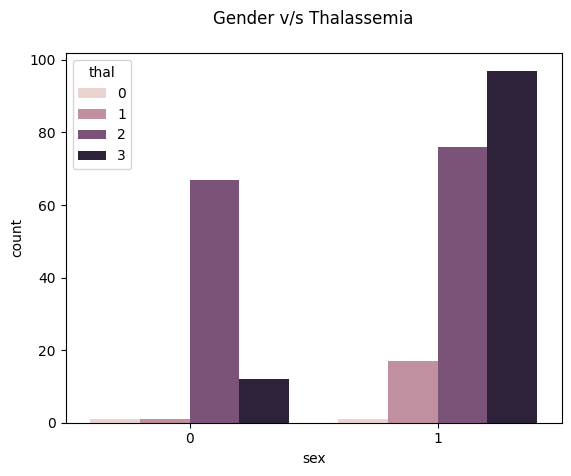

In [ ]:
sns.countplot(data= df_number2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')

###Dari grafik yang ditampilkan untuk sumbu x yaitu target dan sumbu y yaitu cp atau jenis nyeri dada, tentu saja orang yang tidak terkena Heart Disease tidak mempunyai gejala nyeri data (kategori ke-0), dan orang yang terkena Heart Disease paling banyak mengalami nyeri non-angina (ketegori ke-2)

Text(0.5, 1.0, 'Jenis nyeri dada v/s Target\n')

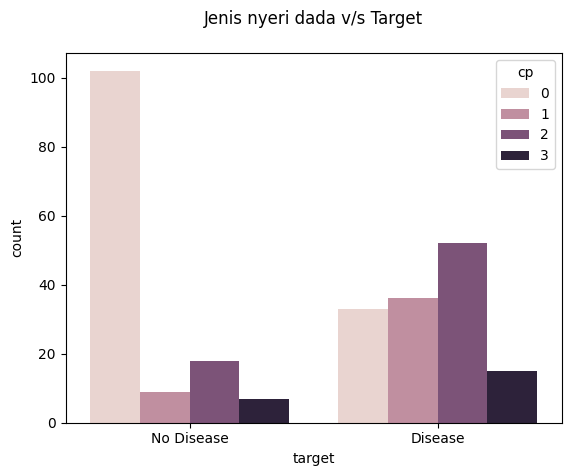

In [ ]:
sns.countplot(data= df_number2, x='target',hue='cp')
plt.title('Jenis nyeri dada v/s Target\n')

###Mengetahui hubungan antar semua feature/tabel menggunakan heatmap

<ipython-input-31-efbd3d385a96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_number2.corr(),annot=True,cmap="magma",fmt='.2f')


<Axes: >

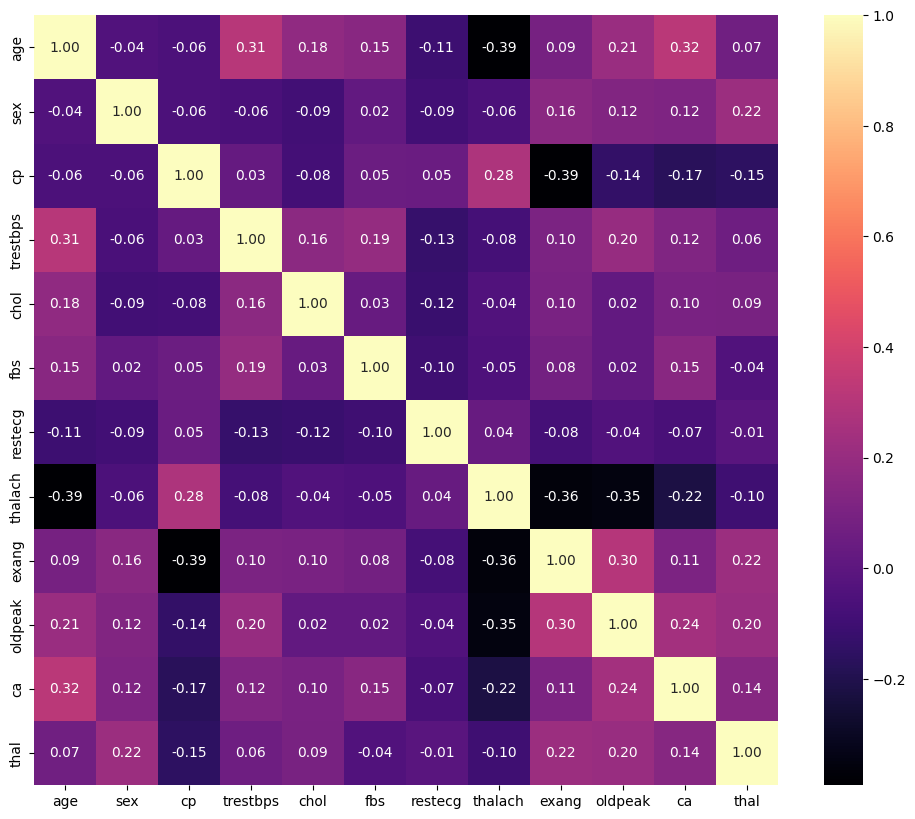

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_number2.corr(),annot=True,cmap="magma",fmt='.2f')

###Penggunaan mean adalah untuk mencari rata-rata dari sebuah kolom atau lebih, disini contoh untuk rata-rata dari kolom "Age", kemudian untuk mode yaitu untuk mencari nilai atau value yang paling sering muncul dari kolom, dan selanjutnya untuk median yaitu mencari nilai tengah. Nah dalam kasus ini, mean, median dan mode (3M) hanya bisa digunakan pada tipe data numerical dalam kolom, sebenarnya bisa digunakan pada tipe string/karakter akan tetapi dalam dataframe tidak ada string melainkan object, dimana saat digunakan 3M akan terjadi error

In [ ]:
df_number2['age'].mean()

54.330882352941174

In [ ]:
df_number2['age'].mode()

0    58
Name: age, dtype: int64

In [ ]:
df_number2['age'].median()

56.0

###Menemukan Statistical Five Summaries menggunakan .describe(), dimana akan ditampilkan jumlah baris dari tiap kolom yang terisi(bernilai), mean, min-max, distribusi data pada 25%, 50%, dan 75% serta standar deviasi dari tiap kolom,
###Dengan catatan tidak semua nilai kolom pada Statistical Five Summaries dapat digunakan karena sebenarnya terdapat kolom yang mana itu adalah tipe data object akan tetapi harus diubah ke numeric karena untuk pemrosesan, komputer hanya bisa membaca nilai numerical, contohnya untuk target hanya ada nilai 1 untuk No Disease dan 0 untuk Disease

In [ ]:
df_number2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,54.330882,0.702206,0.922794,131.459559,242.470588,0.132353,0.529412,148.433824,0.349265,1.052941,0.750000,2.319853
std,9.201761,0.458131,1.036918,17.712084,45.227256,0.339499,0.528748,23.343165,0.477617,1.188937,1.007353,0.628865
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,132.000000,0.000000,0.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,151.000000,0.000000,0.650000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,165.000000,1.000000,1.800000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000,3.000000


In [ ]:
df_number2.select_dtypes(object).head()

,slope,target
0,Downsloping,No Disease
1,Upsloping,No Disease
2,Upsloping,No Disease
3,Downsloping,No Disease
4,Flat,No Disease


###Mengubah data object ke numerical dengan menggunakan metode encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_after_labelEncoding = df_number2.copy()
df_after_labelEncoding["target"] = encoder.fit_transform(df_number2["target"])
df_after_labelEncoding["slope"] = encoder.fit_transform(df_number2["slope"])
df_after_labelEncoding

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,0,2,3,1
1,53,1,0,140,203,1,0,155,1,3.1,2,0,3,1
2,70,1,0,145,174,0,1,125,1,2.6,2,0,3,1
3,61,1,0,148,203,0,1,161,0,0.0,0,1,3,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,46,1,1,101,197,1,1,156,0,0.0,0,0,3,0
268,71,0,0,112,149,0,1,125,0,1.6,1,0,2,0
269,41,1,2,130,214,0,0,168,0,2.0,1,0,2,0
270,54,1,2,125,273,0,0,152,0,0.5,2,1,2,0


###Distribusi Data dari Kolom sex/gender, dimana 1 untuk male dan 0 untuk female
###Dimana dapat terlihat dari data bahwa jumlah male lebih banyak dari jumlah female

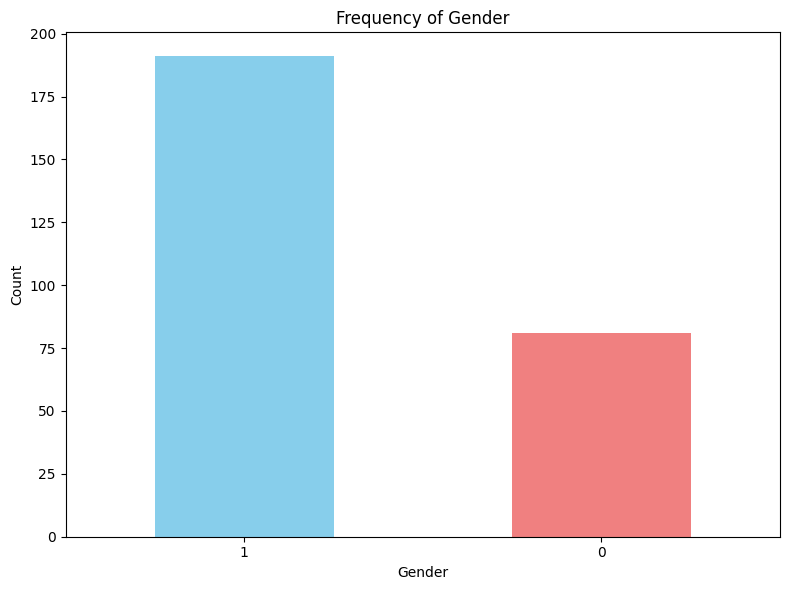

In [ ]:
sex_counts = df_after_labelEncoding['sex'].value_counts()

plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

# Set chart title and labels
plt.title('Frequency of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the chart
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###Kemudian untuk distribusi pada kolom "thal" atau Kelainan Darah dari data yang diberikan dimana terdapat 4 kategori (sumbu x) yaitu kategori untuk 0: tetap NULL, 1: fixed defect (no blood flow in some part of the heart), 2: normal blood flow, dan 3: reversible defect (a blood flow is observed but it is not normal), dimana data orang dengan kelainan darah pada kategori ke-2 adalah yang terbanyak

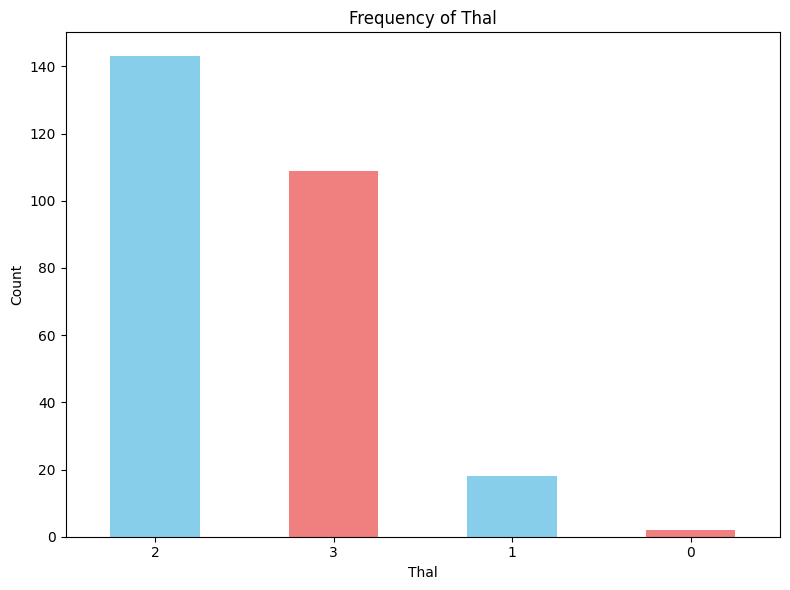

In [ ]:
thal_counts = df_after_labelEncoding['thal'].value_counts()

plt.figure(figsize=(8, 6))
thal_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.title('Frequency of Thal')
plt.xlabel('Thal')
plt.ylabel('Count')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###Dan untuk distribusi umur dari dataset yang diberikan dan telah melewati beberapa proses dapat dilihat bahwa distribusi data yang terjadi adalah distribusi normal yang mana jumlah umur yang menjadi nilai tengah adalah yang terbanyak

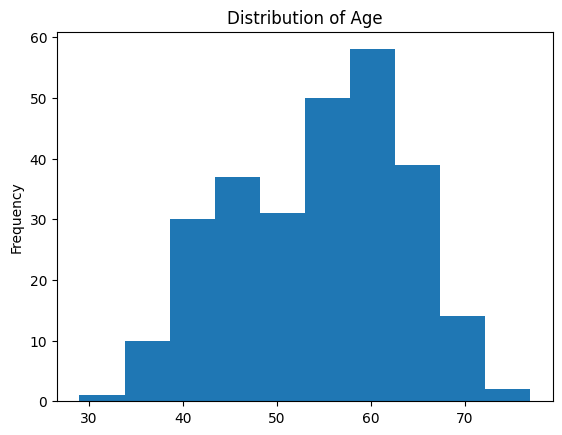

In [ ]:
df_after_labelEncoding['age'].plot.hist(title="Distribution of Age", xlabel="Age", ylabel="Frequency")
plt.show()

###**Nomor 3**

###Membuat dataframe untuk nomor 3 dari dataframe hasil pengolahan data dari nomor 1 dan 2

In [ ]:
df_number3 = df_after_labelEncoding.copy()
df_number3.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,0,2,3,1
1,53,1,0,140,203,1,0,155,1,3.1,2,0,3,1
2,70,1,0,145,174,0,1,125,1,2.6,2,0,3,1
3,61,1,0,148,203,0,1,161,0,0.0,0,1,3,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1


##New Feature -- Hasil Grafik Setelah 10 feature baru dibuat

###Feature 1: Membuat kolom baru "Hypertensi" dengan kombinasi antara kolom "trestbps" dan "chol" yang mana diketahui bahwa trestbps yaitu tekanan darah normal dari pasien adalah dibawah 120 dan colestrol normal orang adalah dibawah 200. Maka dari itu dapat dikatakan bahwa jika value telah diatas nilai normal dari tekanan darah dan kolestrol dapat dikatakan pasien tersebut mengalami hypertensi. Kolom hypertensi ini dapat menjadi fitur baru untuk dianalisis apakah orang yang mengalami hypertensi terkena disease atau tidak (hasil pada grafik dibawah)

In [ ]:
df_number3['hypertensi'] = (df_number3['trestbps'] > 120) & (df_number3['chol'] > 200)
df_number3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hypertensi
0,52,1,0,125,212,0,1,168,0,1.0,0,2,3,1,True
1,53,1,0,140,203,1,0,155,1,3.1,2,0,3,1,True
2,70,1,0,145,174,0,1,125,1,2.6,2,0,3,1,False
3,61,1,0,148,203,0,1,161,0,0.0,0,1,3,1,True
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1,True


###Feature 2: Membuat kolom baru "group_age" dengan mengetahui ketegori dari umur dari dataset, dimana dengan ketentuan dibawah 18 tahun adalah Anak, diatas 17 dan dibawah 66 adalah Dewasa, dan diatas 65 adalah Tua. Dengan pembagian kategori umur ini, kita dapat mengetahui kategori mana yang paling banyak terserang Heart Disease

In [ ]:
def group_age(age):
    if age <= 17:
      return 'Anak'
    if (age > 17) & (age < 66):
      return 'Dewasa'
    if age >= 66:
      return 'Tua'
    else:
      return 0

df_number3['group_age'] = df_number3['age'].apply(group_age)
df_number3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hypertensi,group_age
0,52,1,0,125,212,0,1,168,0,1.0,0,2,3,1,True,Dewasa
1,53,1,0,140,203,1,0,155,1,3.1,2,0,3,1,True,Dewasa
2,70,1,0,145,174,0,1,125,1,2.6,2,0,3,1,False,Tua
3,61,1,0,148,203,0,1,161,0,0.0,0,1,3,1,True,Dewasa
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1,True,Dewasa


###Feature 3: Membuat kolom baru "blood_disorders" dengan ketentuan pada kelainan darah kategori ke-3 yaitu reversible defect (a blood flow is observed but it is not normal) pada kolom "thal". Sehingga nantinya kita dapat menganalisis apakah orang terkena Hearth Disease karena kelainan darah kategori ke-3 atau tidak.

In [ ]:
df_number3['blood_disorders'] = (df_number3['thal'] == 3)
df_number3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hypertensi,group_age,blood_disorders
0,52,1,0,125,212,0,1,168,0,1.0,0,2,3,1,True,Dewasa,True
1,53,1,0,140,203,1,0,155,1,3.1,2,0,3,1,True,Dewasa,True
2,70,1,0,145,174,0,1,125,1,2.6,2,0,3,1,False,Tua,True
3,61,1,0,148,203,0,1,161,0,0.0,0,1,3,1,True,Dewasa,True
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1,True,Dewasa,False


###Feature 4: Membuat kolom baru "normal_colestrol" dengan nilai berdasarkan kolom "chol" dimana jika > 200 maka kondisi Abnormal dan selain itu Normal. Kolom ini dapat kita analisis untuk mengetahui apakah kondisi Abnormal dan Normal mempengaruhi Hearth Disease atau tidak.

In [ ]:
def normal_colestrol(chol):
    if chol > 200:
      return 'Abnormal'
    else:
      return 'Normal'

df_number3['normal_colestrol'] = df_number3['chol'].apply(normal_colestrol)
df_number3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hypertensi,group_age,blood_disorders,normal_colestrol
0,52,1,0,125,212,0,1,168,0,1.0,0,2,3,1,True,Dewasa,True,Abnormal
1,53,1,0,140,203,1,0,155,1,3.1,2,0,3,1,True,Dewasa,True,Abnormal
2,70,1,0,145,174,0,1,125,1,2.6,2,0,3,1,False,Tua,True,Normal
3,61,1,0,148,203,0,1,161,0,0.0,0,1,3,1,True,Dewasa,True,Abnormal
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1,True,Dewasa,False,Abnormal


###Feature 5: Membuat kolom baru "by_blood_sugar" berdasarkan kolom fbs dengan kategori 1 yang mana kategori 1 adalah gula darah dari pasien > 120 yang mana itu bisa disebut kondisi tidak normal (diabetes). Dari kolom baru ini, dapat dianalisis apakah orang yang diabetes mempengaruhi dia terkena Heart Disease atau tidak

In [ ]:
def by_blood_sugar(fbs):
    if fbs == 1:
      return 'Diabetes'
    else:
      return 'No Diabetes'

df_number3['by_blood_sugar'] = df_number3['fbs'].apply(by_blood_sugar)
df_number3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hypertensi,group_age,blood_disorders,normal_colestrol,by_blood_sugar
0,52,1,0,125,212,0,1,168,0,1.0,0,2,3,1,True,Dewasa,True,Abnormal,No Diabetes
1,53,1,0,140,203,1,0,155,1,3.1,2,0,3,1,True,Dewasa,True,Abnormal,Diabetes
2,70,1,0,145,174,0,1,125,1,2.6,2,0,3,1,False,Tua,True,Normal,No Diabetes
3,61,1,0,148,203,0,1,161,0,0.0,0,1,3,1,True,Dewasa,True,Abnormal,No Diabetes
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1,True,Dewasa,False,Abnormal,Diabetes


###Feature 6: Membuat kolom baru "no_symptoms" dengan mengikuti kategori pada kolom "cp" yaitu 0 untuk nyeri dada tanpa gejala dan "thal" kategori 2 untuk aliran darah normal. Kolom baru ini dapat kita analisis apakah orang tanpa gejala apapun bisa menderita hearth disease atau tidak

In [ ]:
df_number3['no_symptoms'] = (df_number3['cp'] == 0) & (df_number3['thal'] == 2)
df_number3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hypertensi,group_age,blood_disorders,normal_colestrol,by_blood_sugar,no_symptoms
0,52,1,0,125,212,0,1,168,0,1.0,0,2,3,1,True,Dewasa,True,Abnormal,No Diabetes,False
1,53,1,0,140,203,1,0,155,1,3.1,2,0,3,1,True,Dewasa,True,Abnormal,Diabetes,False
2,70,1,0,145,174,0,1,125,1,2.6,2,0,3,1,False,Tua,True,Normal,No Diabetes,False
3,61,1,0,148,203,0,1,161,0,0.0,0,1,3,1,True,Dewasa,True,Abnormal,No Diabetes,False
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1,True,Dewasa,False,Abnormal,Diabetes,True


###Feature 7: Membuat kolom baru "ca2_thal2_restecg1" yang mana ini adalah campuran dari 3 kategori dari 3 kolom, untuk kolom "ca" kategori 2 yaitu jumlah pembulu darah adalah 2, kemudian kolom "thal" kategori 2 yaitu  normal blood flow, dan "restecg" kategori 1 yaitu resting electrocardiographic results normal. Hasil dari kolom baru ini dapat kita gunakan untuk mengetahui apakah jumlah orang yang memiliki pembulu darah 2 dengan kondisi aliran darah normal dan hasil resting electrocardiographic normal memiliki pengaruh pada orang yang terkena Heart Disease atau tidak

In [ ]:
df_number3['ca2_thal2_restecg1'] = (df_number3['ca'] == 2) & (df_number3['thal'] == 2) & (df_number3['restecg'] == 1) #2 pembulu dengan 2 keadaan normal
df_number3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,hypertensi,group_age,blood_disorders,normal_colestrol,by_blood_sugar,no_symptoms,ca2_thal2_restecg1
0,52,1,0,125,212,0,1,168,0,1.0,...,2,3,1,True,Dewasa,True,Abnormal,No Diabetes,False,False
1,53,1,0,140,203,1,0,155,1,3.1,...,0,3,1,True,Dewasa,True,Abnormal,Diabetes,False,False
2,70,1,0,145,174,0,1,125,1,2.6,...,0,3,1,False,Tua,True,Normal,No Diabetes,False,False
3,61,1,0,148,203,0,1,161,0,0.0,...,1,3,1,True,Dewasa,True,Abnormal,No Diabetes,False,False
4,62,0,0,138,294,1,1,106,0,1.9,...,3,2,1,True,Dewasa,False,Abnormal,Diabetes,True,False


###Feature 8: Membuat kolom baru "fbs0_thal2" yang mana ini adalah campuran dari 2 kategori dari 2 kolom, yaitu kolom "fbs" dengan kategori 0 dimana kondisinya gula darah orang < 120 (normal) dan kolom "thal" kategori 2 yaitu  normal blood flow. Kolom baru ini dapat kita analisis apakah kondisi gula darah normal dan aliran darah normal orang berpengaruh pada kasus Heart Disease ini

In [ ]:
df_number3['fbs0_thal2'] = (df_number3['fbs'] == 0) & (df_number3['thal'] == 2)
df_number3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,hypertensi,group_age,blood_disorders,normal_colestrol,by_blood_sugar,no_symptoms,ca2_thal2_restecg1,fbs0_thal2
0,52,1,0,125,212,0,1,168,0,1.0,...,3,1,True,Dewasa,True,Abnormal,No Diabetes,False,False,False
1,53,1,0,140,203,1,0,155,1,3.1,...,3,1,True,Dewasa,True,Abnormal,Diabetes,False,False,False
2,70,1,0,145,174,0,1,125,1,2.6,...,3,1,False,Tua,True,Normal,No Diabetes,False,False,False
3,61,1,0,148,203,0,1,161,0,0.0,...,3,1,True,Dewasa,True,Abnormal,No Diabetes,False,False,False
4,62,0,0,138,294,1,1,106,0,1.9,...,2,1,True,Dewasa,False,Abnormal,Diabetes,True,False,False


###Feature 9: Membuat kolom baru "cp2_restecg2_thal3" yang mana ini adalah campuran dari 3 kategori dari 3 kolom, untuk kolom "cp" kategori 2 yaitu jenis nyeri dada non-angina, kemudian kolom "restecg" kategori 2 yaitu resting electrocardiographic results memiliki kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), dan "thal" kategori 3 yaitu resting electrocardiographic results cacat reversibel (ada aliran darah tetapi tidak normal). Hasil dari kolom baru ini dapat kita analisis apakah data yang memenuhi ketiga kategori dari kondisi itu mempengaruhi orang terkena Disease atau tidak

In [ ]:
df_number3['cp2_restecg2_thal3'] = ((df_number3['cp'] == 2) & (df_number3['restecg'] == 2)) | (df_number3['thal'] == 3)
df_number3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,hypertensi,group_age,blood_disorders,normal_colestrol,by_blood_sugar,no_symptoms,ca2_thal2_restecg1,fbs0_thal2,cp2_restecg2_thal3
0,52,1,0,125,212,0,1,168,0,1.0,...,1,True,Dewasa,True,Abnormal,No Diabetes,False,False,False,True
1,53,1,0,140,203,1,0,155,1,3.1,...,1,True,Dewasa,True,Abnormal,Diabetes,False,False,False,True
2,70,1,0,145,174,0,1,125,1,2.6,...,1,False,Tua,True,Normal,No Diabetes,False,False,False,True
3,61,1,0,148,203,0,1,161,0,0.0,...,1,True,Dewasa,True,Abnormal,No Diabetes,False,False,False,True
4,62,0,0,138,294,1,1,106,0,1.9,...,1,True,Dewasa,False,Abnormal,Diabetes,True,False,False,False


###Feature 10: Membuat kolom baru "exang1_thal2" yang mana ini adalah campuran dari 2 kategori dari 2 kolom, yaitu kolom "exang" dengan kategori 1 dimana nyeri dada angina disebabkan oleh olahraga dan kolom "thal" kategori 2 yaitu  normal blood flow. Kolom baru ini dapat kita analisis apakah kondisi nyeri dada akibat olahraga padahal aliran darah normal apakah dapat mempengaruhi orang terkena heart disease

In [ ]:
df_number3['exang1_thal2'] = (df_number3['exang'] == 1) & (df_number3['thal'] == 2)
df_number3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,hypertensi,group_age,blood_disorders,normal_colestrol,by_blood_sugar,no_symptoms,ca2_thal2_restecg1,fbs0_thal2,cp2_restecg2_thal3,exang1_thal2
0,52,1,0,125,212,0,1,168,0,1.0,...,True,Dewasa,True,Abnormal,No Diabetes,False,False,False,True,False
1,53,1,0,140,203,1,0,155,1,3.1,...,True,Dewasa,True,Abnormal,Diabetes,False,False,False,True,False
2,70,1,0,145,174,0,1,125,1,2.6,...,False,Tua,True,Normal,No Diabetes,False,False,False,True,False
3,61,1,0,148,203,0,1,161,0,0.0,...,True,Dewasa,True,Abnormal,No Diabetes,False,False,False,True,False
4,62,0,0,138,294,1,1,106,0,1.9,...,True,Dewasa,False,Abnormal,Diabetes,True,False,False,False,False


###Melakukan encoding pada kolom dengan tipe data object untuk membuat grafik

In [ ]:
df_laberEndocing_number3 = df_number3.copy()
df_laberEndocing_number3["hypertensi"] = encoder.fit_transform(df_number3["hypertensi"])
df_laberEndocing_number3["group_age"] = encoder.fit_transform(df_number3["group_age"])
df_laberEndocing_number3["blood_disorders"] = encoder.fit_transform(df_number3["blood_disorders"])
df_laberEndocing_number3["normal_colestrol"] = encoder.fit_transform(df_number3["normal_colestrol"])
df_laberEndocing_number3["by_blood_sugar"] = encoder.fit_transform(df_number3["by_blood_sugar"])
df_laberEndocing_number3["no_symptoms"] = encoder.fit_transform(df_number3["no_symptoms"])
df_laberEndocing_number3["ca2_thal2_restecg1"] = encoder.fit_transform(df_number3["ca2_thal2_restecg1"])
df_laberEndocing_number3["fbs0_thal2"] = encoder.fit_transform(df_number3["fbs0_thal2"])
df_laberEndocing_number3["cp2_restecg2_thal3"] = encoder.fit_transform(df_number3["cp2_restecg2_thal3"])
df_laberEndocing_number3["exang1_thal2"] = encoder.fit_transform(df_number3["exang1_thal2"])
df_laberEndocing_number3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,hypertensi,group_age,blood_disorders,normal_colestrol,by_blood_sugar,no_symptoms,ca2_thal2_restecg1,fbs0_thal2,cp2_restecg2_thal3,exang1_thal2
0,52,1,0,125,212,0,1,168,0,1.0,...,1,0,1,0,1,0,0,0,1,0
1,53,1,0,140,203,1,0,155,1,3.1,...,1,0,1,0,0,0,0,0,1,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,1,1,1,1,0,0,0,1,0
3,61,1,0,148,203,0,1,161,0,0.0,...,1,0,1,0,1,0,0,0,1,0
4,62,0,0,138,294,1,1,106,0,1.9,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,46,1,1,101,197,1,1,156,0,0.0,...,0,0,1,1,0,0,0,0,1,0
268,71,0,0,112,149,0,1,125,0,1.6,...,0,1,0,1,1,1,0,1,0,0
269,41,1,2,130,214,0,0,168,0,2.0,...,1,0,0,0,1,0,0,1,0,0
270,54,1,2,125,273,0,0,152,0,0.5,...,1,0,0,0,1,0,0,1,0,0


###Membuat dataframe baru untuk grafik nomor 3 setelah di encoding

In [ ]:
df_grap_nmr3 = df_laberEndocing_number3.copy()

###Graph Feature 1: Dapat dilihat bahwa pada kolom target dimana 0 adalah Heart Disease dan 1 adalah No Heart Disease. Kolom hypertensi untuk 0 adalah False atau tidak terindikasi dan 1 adalah True atau terindikasi. Hasil dari grafik menunjukkan bahwa orang yang terindikasi menderita hypertensi mempunyai penyakit heart disease. Jadi, sebaiknya orang yang telah menderita hypertensi dapat memeriksakan diri untuk mengetahui penyakit heart disease karena mempunyai persentase yang besar terkena heart disease

Text(0.5, 1.0, 'Target v/s Hypertensi\n')

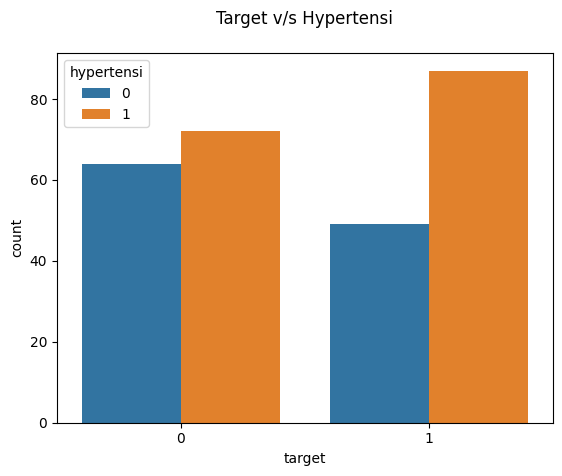

In [ ]:
sns.countplot(data= df_grap_nmr3, x='target',hue='hypertensi')
plt.title('Target v/s Hypertensi\n')

###Graph Feature 2: Group age 0 untuk Tua dan Dewasa 1, maka dapat dilihat data menunjukkan bahwa orang Tua sangat banyak yang terkena heart disease. Jadi untuk orang tua dapat selalu melakukan kontrol untuk menjaga kesehatan tubuh

Text(0.5, 1.0, 'Target v/s group age\n')

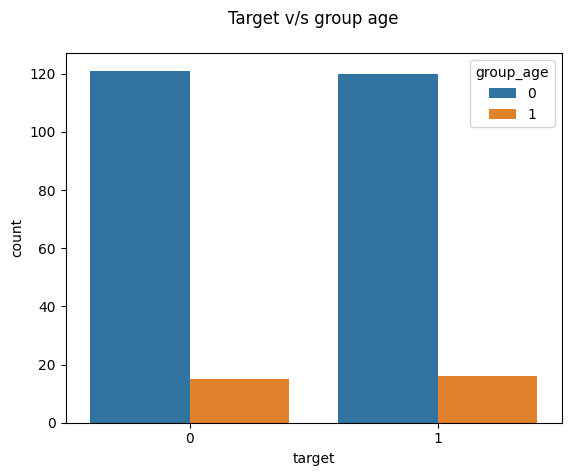

In [ ]:
sns.countplot(data= df_grap_nmr3, x='target',hue='group_age')
plt.title('Target v/s group age\n')

###Graph Feature 3: Blood disorder 0 adalah False atau mempunyai gangguan pada sistem aliran darah dan 1 adalah True yang tidak memiliki gangguan pada aliran darah. Dapat dilihat dari grafik bahwa orang yang terindikasi mempunyai gangguan aliran darah kemungkinan besar juga menderita heart disease. Jadi, orang yang memiliki gangguan pada aliran darah dapat selalu melakukan kontroling ke dokter untuk menjaga kesehatan

Text(0.5, 1.0, 'Target v/s blood disorders\n')

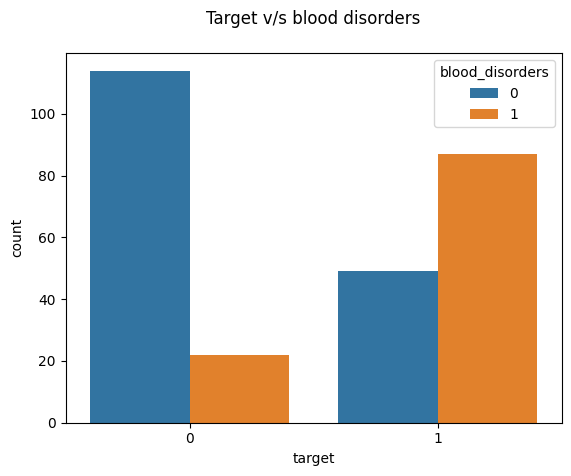

In [ ]:
sns.countplot(data= df_grap_nmr3, x='target',hue='blood_disorders')
plt.title('Target v/s blood disorders\n')

###Graph Feature 4: normal colestrol untuk 0 adalah Abnormal dan 1 adalah Normal, dari grafik yang didapatkan menunjukkan bahwa orang yang terindikasi heart disease mempunyai colestrol yang abnormal akan tetapi yang tidak terkena heart disease juga mempunyai banyak colestrol yang abnormal

Text(0.5, 1.0, 'Target v/s Normal Colestrol\n')

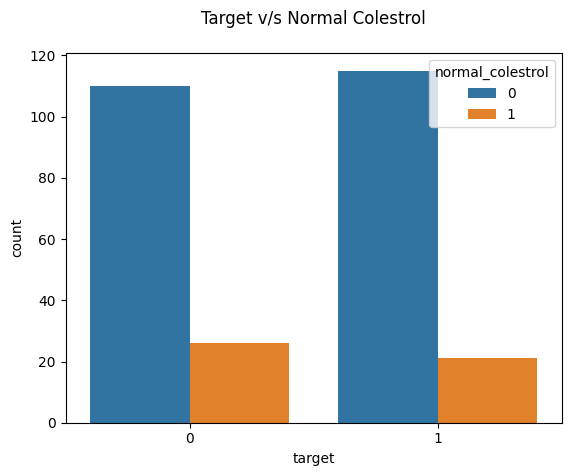

In [ ]:
sns.countplot(data= df_grap_nmr3, x='target',hue='normal_colestrol')
plt.title('Target v/s Normal Colestrol\n')

###Graph Feature 5: Blood sugar atau gula darah, untuk 1 -> No Diabeter dan 0 -> Diabetes, dari data pada grafik menunjukkan bahwa orang yang terkena heart disease dan tidak terkena itu tidak terlalu dipengaruhi oleh gula darah

Text(0.5, 1.0, 'Target v/s blood_sugar\n')

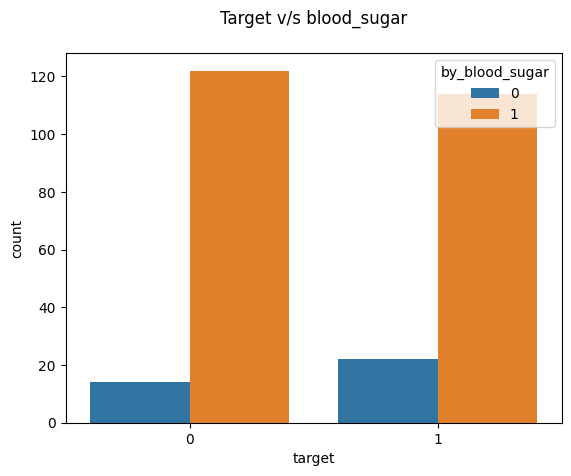

In [ ]:
sns.countplot(data= df_grap_nmr3, x='target',hue='by_blood_sugar')
plt.title('Target v/s blood_sugar\n')

###Graph Feature 6: no symptoms atau tanpa gejala nyeri dada dan aliran darah normal, 0 untuk False berarti tetap mengalami nyeri dada atau aliran darah tidak normal dan 1 untuk True tanpa gejala sama sekali, dari grafik menunjukkan bahwa orang yang terkena penyakit heart disease atau tidak itu tetap memiliki gejala, kadang gejala dapat berarti terkena dan kadang tidak

Text(0.5, 1.0, 'Target v/s no symptoms\n')

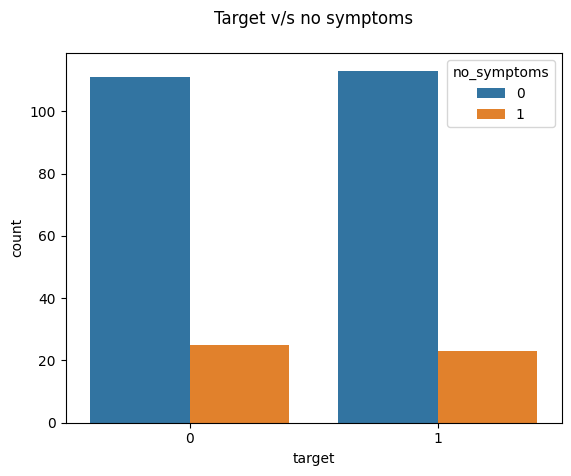

In [ ]:
sns.countplot(data= df_grap_nmr3, x='target',hue='no_symptoms')
plt.title('Target v/s no symptoms\n')

###Graph 7: Untuk 3 kondisi yaitu 0 False kondisi tidak terpenuhi dan 1 True kondisi terpenuhi, nah ternyata dari grafik tersebut ketiga kondisi tersebut tidak mempengaruhi apakah orang tersebut terkena heart disease atau tidak

Text(0.5, 1.0, 'Target v/s with 3 reason\n')

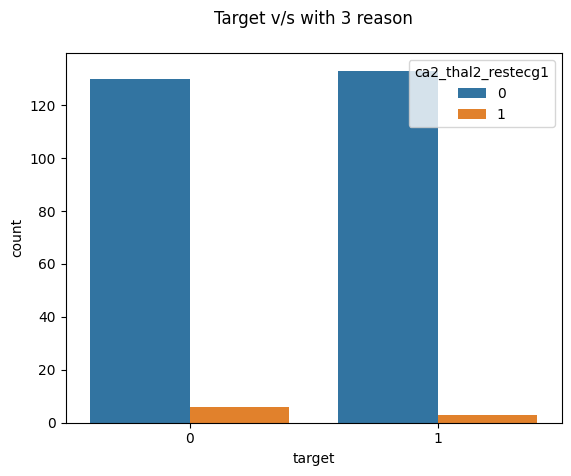

In [ ]:
sns.countplot(data= df_grap_nmr3, x='target',hue='ca2_thal2_restecg1')
plt.title('Target v/s with 3 reason\n')

###Graph Feature 8: Untuk 2 kondisi yaitu 0 False kondisi tidak terpenuhi dan 1 True kondisi terpenuhi, dari grafik dapat dilihat bahwa orang yang terkena heart disease banyak yang memenuhi 2 kondisi tersebut. Jadi sebagai pasien atau orang yang sudah merasa memenuhi 2 kondisi tersebut, dapat memeriksakan diri dan selalu melakukan kontrol ke dokter

Text(0.5, 1.0, 'Target v/s with 2 reason\n')

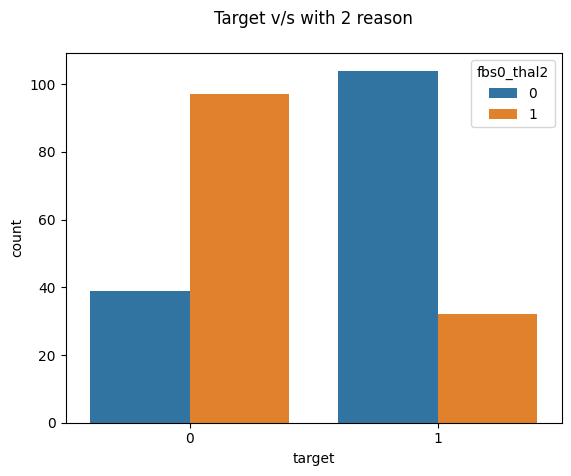

In [ ]:
sns.countplot(data= df_grap_nmr3, x='target',hue='fbs0_thal2')
plt.title('Target v/s with 2 reason\n')

###Graph Feature 9: Untuk 3 kondisi yaitu 0 False kondisi tidak terpenuhi dan 1 True kondisi terpenuhi, dari grafik menunjukkan bahwa orang yang memenuhi ketiga kondisi tersebut sangat sedikit yang mengalami penyakit heart disease

Text(0.5, 1.0, 'Target v/s with 3 reason\n')

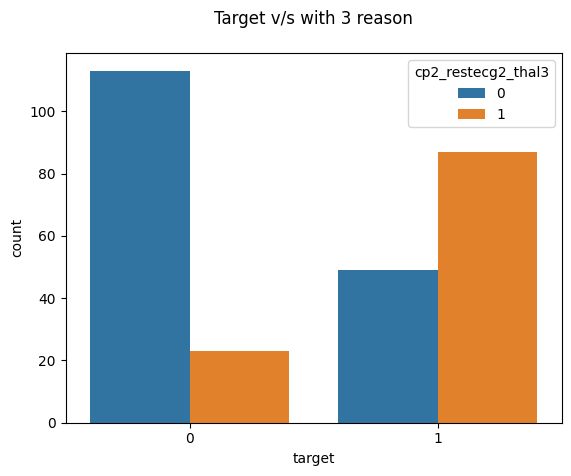

In [ ]:
sns.countplot(data= df_grap_nmr3, x='target',hue='cp2_restecg2_thal3')
plt.title('Target v/s with 3 reason\n')

###Graph Feature 10: Untuk 2 kondisi yaitu 0 False kondisi tidak terpenuhi dan 1 True kondisi terpenuhi, dapat dilihat pada grafik kedua kondisi tersebut bisa menjadi alasan orang terkena heart disease atau tidak. Jadi sebaiknya jika sudah memenuhi kedua kondisi tersebut, orang harus segera melakukan pemeriksaan walaupun tidak ada riwayat penyakit

Text(0.5, 1.0, 'Target v/s with 2 reason\n')

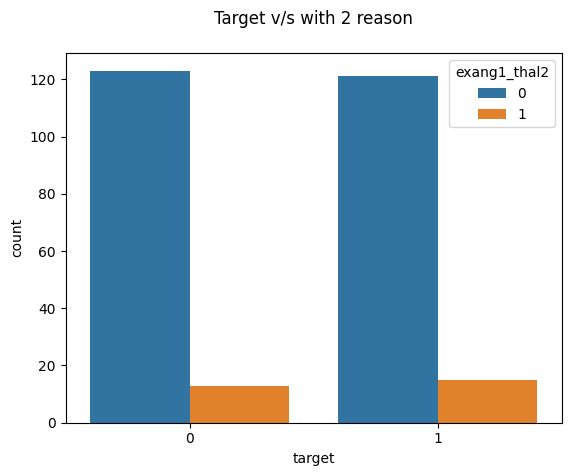

In [ ]:
sns.countplot(data= df_grap_nmr3, x='target',hue='exang1_thal2')
plt.title('Target v/s with 2 reason\n')

**THANK U ASSIGNMENT 2**